# Movies Dataset - Data Exploration and Correlations

In this dataset, I will explore the data to:
1. Identify correlations between variables 
2. Test the hypothesis that certain companies are performing better than others.
3. Demonstrate findings with visualizations.

**Data**: Data used in this project was obtain from the [MOVIE INDUSTRY](https://www.kaggle.com/datasets/danielgrijalvas/movies) dataset, obtained from Kaggle.

In [49]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,6)

In [50]:
# Load data
df = pd.read_csv('movies.csv')

In [51]:
# Preview data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Data cleaning

In [52]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


* Datatypes are correct. However, 'votes', 'budget', 'gross' can be changed to int64 for better view.
* 'released' needs to be splitted into 'released_year' and 'released_country' for better analysis
* There are missing data in the dataset.

In [53]:
# Check missing data
for column in df.columns:
    percent_missing = np.mean(df[column].isnull())*100
    print('{} - {:.2f}%'.format(column, percent_missing))

name - 0.00%
rating - 1.00%
genre - 0.00%
year - 0.00%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.00%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


* Since none of the columns have more than 30% missing values, we can safely drop all NAs in the data set

In [54]:
# Drop missing values
df.dropna(inplace=True)

In [55]:
# Split up 'released' into 'released_date' and 'released_country'
df[['released_date', 'released_country']] = df['released'].str.split('\(', n=1, expand=True)
df['released_date'] = df['released_date'].str.strip()
df['released_country'] = df['released_country'].str.strip(')')

In [56]:
# Correct datatype
df[['votes', 'budget', 'gross']] = df[['votes', 'budget', 'gross']].astype('int64')
df['released_date'] = pd.to_datetime(df['released_date'], format='mixed')

In [57]:
# Since 'year' and 'released_date' is not consistent, I need to fix 'year' by creating a 'year_fixed' column with the year parsed from 'released_date' 
df['year_fixed'] = df['released_date'].dt.year

In [58]:
# Drop duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country,year_fixed
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020-01-17,United States,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020-02-14,United States,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020-01-17,United States,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020-02-21,United States,2020


# Numeric values

Text(0.5, 1.0, 'Budget vs. Gross Revenue')

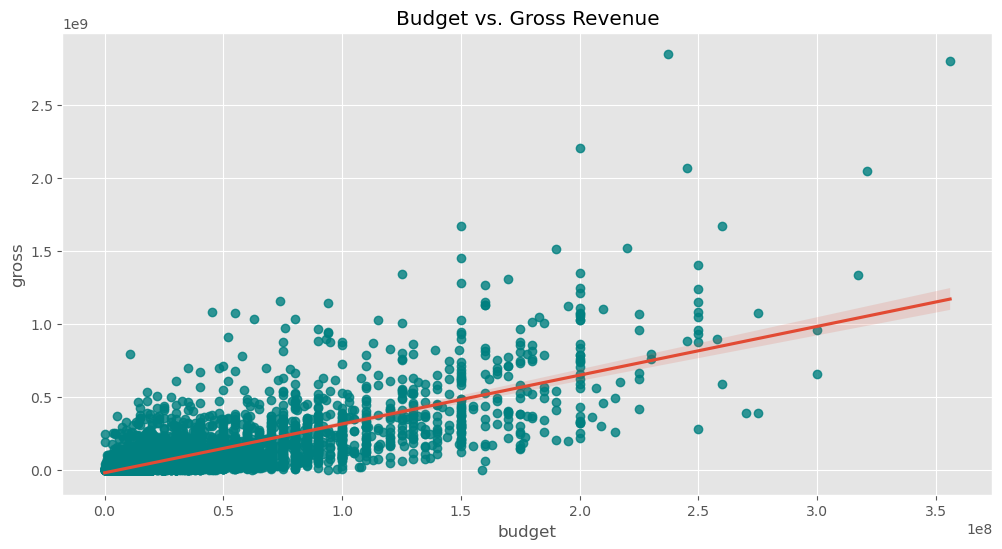

In [59]:
# Prediction: Budget and Revenue has a linear positive relation.
# Scatter plot: budget vs. gross revenue
sns.regplot(data=df, x='budget', y='gross', scatter_kws={'color': 'teal'})
plt.title('Budget vs. Gross Revenue')

* As budget increases, gross revenue tends to increase.

Text(120.72222222222221, 0.5, 'Movies Features')

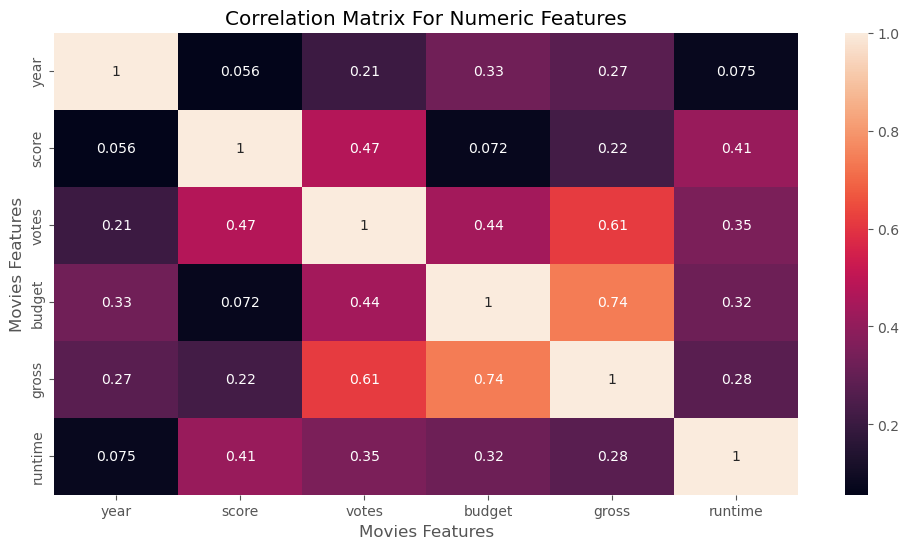

In [60]:
# Let's look at pairwise correlations between numeric variables
corr = df.select_dtypes(['int64', 'float64']).corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')

* buget(0.74) and votes(0.61) have the highest correlations with gross revenue.

## Non-numeric values
* Since non-numeric variables cannot be used for correlation calculation, we can approach them differently to see how they are related to gross revenue
* Variables to be used include: rating, genre, director, writer, star, country, company

In [61]:
# Count unique values:
object_cols = ['rating', 'genre', 'director', 'writer', 'star', 'country', 'company', 'year_fixed']
print('Number of unique values:')
for col in df[object_cols]:
    unique = df[col].nunique()
    print('{} - {}'.format(col, unique))

Number of unique values:
rating - 10
genre - 15
director - 2063
writer - 3205
star - 1845
country - 50
company - 1475
year_fixed - 41


* For rating and genre, we can easily use visualization to see how they are correlated to gross revenue. However, for other variables, it would make more sense to use tests like ANOVA to test the hypothesis of whether they are correlated to gross revenue.

In [62]:
# Perform ANOAVA test for the rest of non_numerical values:
# Load library
from scipy.stats import f_oneway

# Define a function to perform ANOVA test:
def ANOVA_test(cat_col, test_col , data):
    # Perform ANOVA test
    test = [data[test_col][data[cat_col] == unique_col] for unique_col in data[cat_col].unique()]
    f_stat, p_val = f_oneway(*test)
    # Print results
    print('ANOVA Test Results for {}: '.format(cat_col))
    print('F Statistics: {:.4f}'.format(f_stat))
    print('P_value: {:.6f}\n'.format(p_val))

In [63]:
# Run ANOVA test for each non_numeric variables:
print('NULL Hypothesis: Individual categorical variable does not have significant impact on Gross Revenue\n')
for col in object_cols:
    ANOVA_test(col, 'gross', df)

NULL Hypothesis: Individual categorical variable does not have significant impact on Gross Revenue

ANOVA Test Results for rating: 
F Statistics: 43.7330
P_value: 0.000000

ANOVA Test Results for genre: 
F Statistics: 52.2151
P_value: 0.000000

ANOVA Test Results for director: 
F Statistics: 1.8595
P_value: 0.000000

ANOVA Test Results for writer: 
F Statistics: 1.0658
P_value: 0.052119

ANOVA Test Results for star: 
F Statistics: 1.3731
P_value: 0.000000

ANOVA Test Results for country: 
F Statistics: 2.0994
P_value: 0.000012

ANOVA Test Results for company: 
F Statistics: 1.4807
P_value: 0.000000

ANOVA Test Results for year_fixed: 
F Statistics: 11.2044
P_value: 0.000000



* Based on the results of these ANOVA tests, it can be inferred that several categorical variables such as 'rating', 'genre', 'director', 'star', 'country', 'company', and 'year_fixed' do have a significant impact on the 'Gross Revenue' of movies, rejecting the initial assumption stated in the NULL Hypothesis.
* For 'writer', there may not be enough significant evidence to reject the null hypothesis, meaning that writer may not have high influence on gross revenue.

Text(0.5, 1.0, 'Counts of Movies Per Genres')

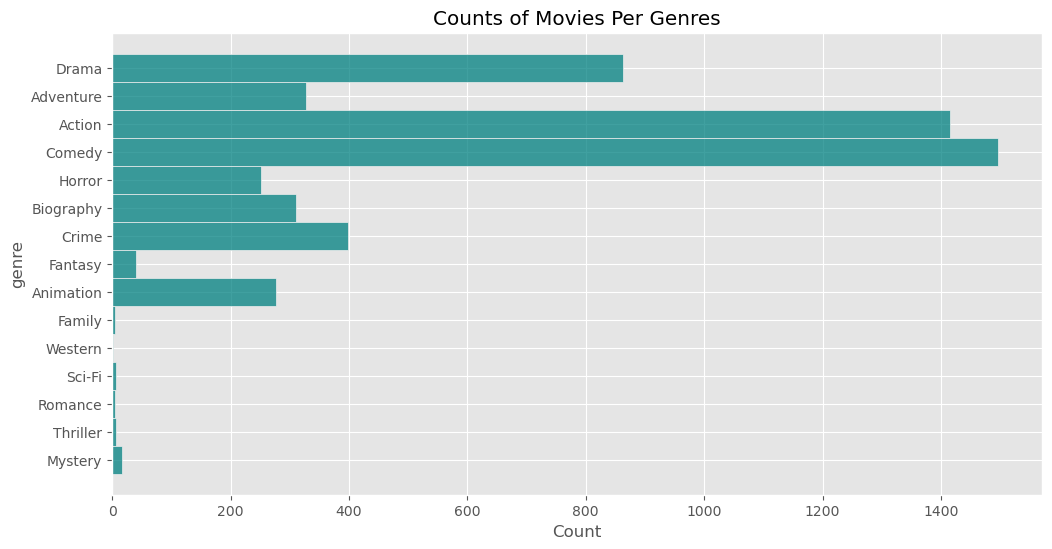

In [64]:
# Which genre is the most popular?
sns.histplot(data=df, y='genre', color='teal')
plt.title('Counts of Movies Per Genres')

* Comedy is the most popular movie genre
* Action is the second most popular

Text(0.5, 1.0, 'Movies Genres vs. Gross Revenues')

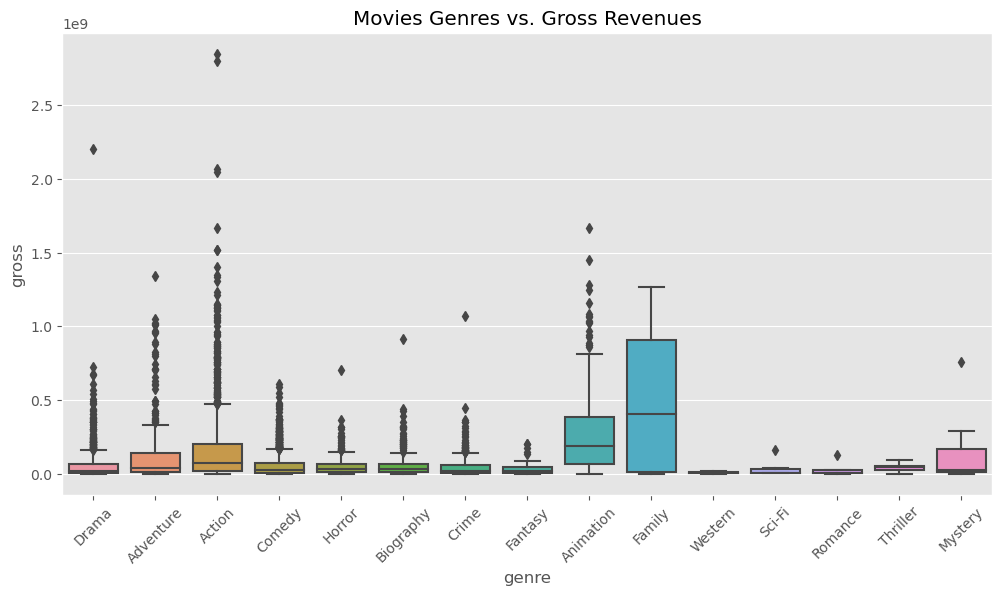

In [65]:
# Which genre generates more gross revenue?
sns.boxplot(data=df, x='genre', y='gross')
plt.xticks(rotation=45) 
plt.title('Movies Genres vs. Gross Revenues')

* Family has the highest ranges in gross revenue
* Action has the most outliners, meaning that gross revenue occationally springs extraordinarily high. Maybe that's why film makers are jumping on the bandwagon???
* Animation, interestingly, has a wide span of gross revenue range

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Family'),
  Text(1, 0, 'Animation'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Mystery'),
  Text(5, 0, 'Biography'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Comedy'),
  Text(8, 0, 'Horror'),
  Text(9, 0, 'Crime'),
  Text(10, 0, 'Thriller'),
  Text(11, 0, 'Fantasy'),
  Text(12, 0, 'Sci-Fi'),
  Text(13, 0, 'Romance'),
  Text(14, 0, 'Western')])

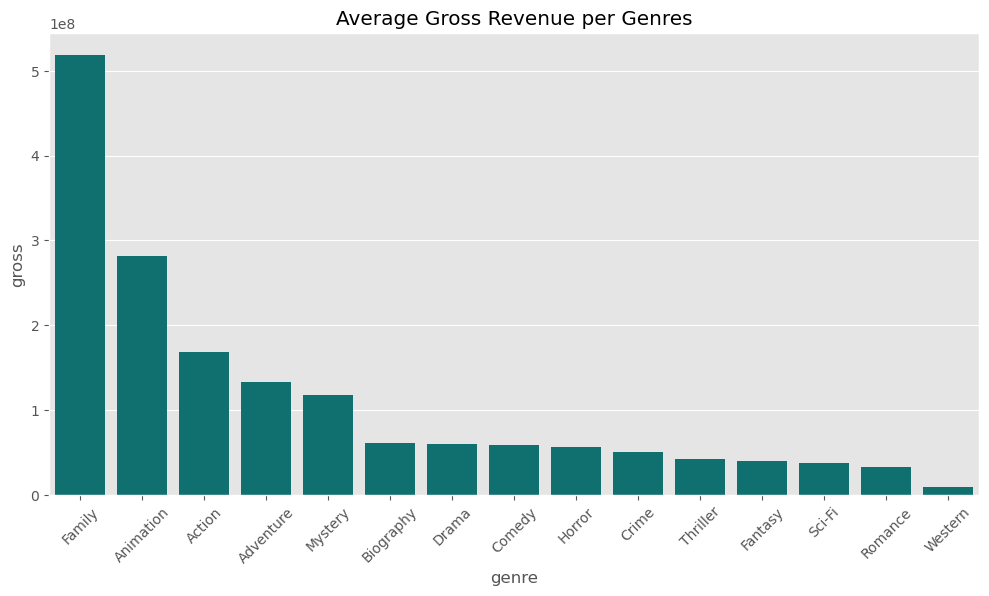

In [66]:
# Plot a bar graph
genre_df = df.groupby('genre')['gross'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=genre_df, x='genre', y='gross', color='teal')
plt.title('Average Gross Revenue per Genres')
plt.xticks(rotation=45)

* Family has highest average revenue. Second place comes Animation. Action only places third place.

In [67]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country,year_fixed
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States,1980


Text(0.5, 1.0, 'Counts of Movie Ratings')

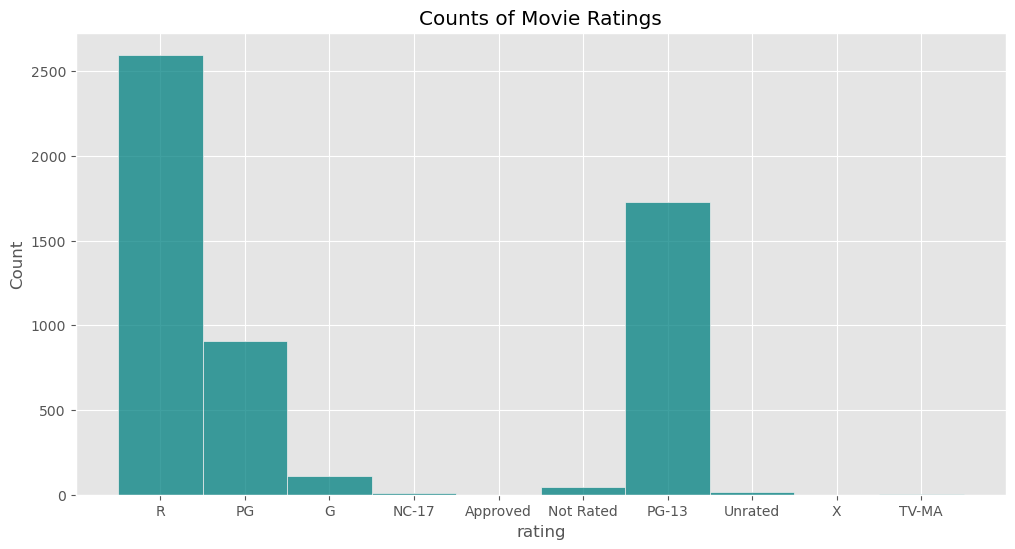

In [68]:
# Repeat the process with rating
sns.histplot(data=df, x='rating', color='teal')
plt.title('Counts of Movie Ratings')

* Rating is the most popular genre, next comes PG-13

Text(0.5, 1.0, 'Movies Rating vs. Gross Revenue')

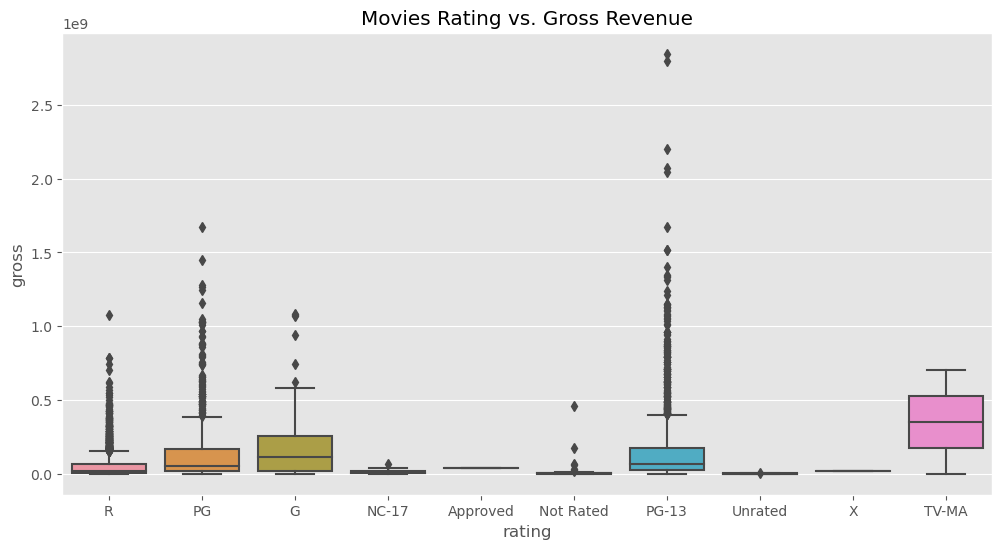

In [69]:
sns.boxplot(data=df, x='rating', y='gross')
plt.title('Movies Rating vs. Gross Revenue')

* TV-MA has higher span of gross revenue compared to others.
* PG-13 tends to gain busting gross revenue than others.

Text(0.5, 1.0, 'Average Gross Revenue per Movie Ratings')

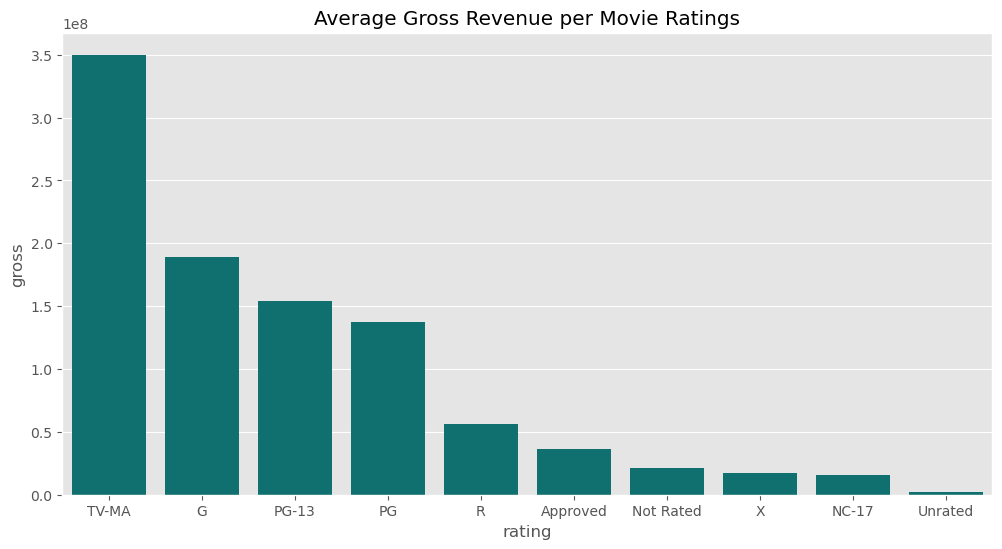

In [70]:
rating_df = df.groupby('rating')['gross'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=rating_df, x='rating', y='gross', color='teal')
plt.title('Average Gross Revenue per Movie Ratings')

* On average, TV-MA almost doules in gross revenue compared to others.

Text(0, 0.5, 'Number of movies made')

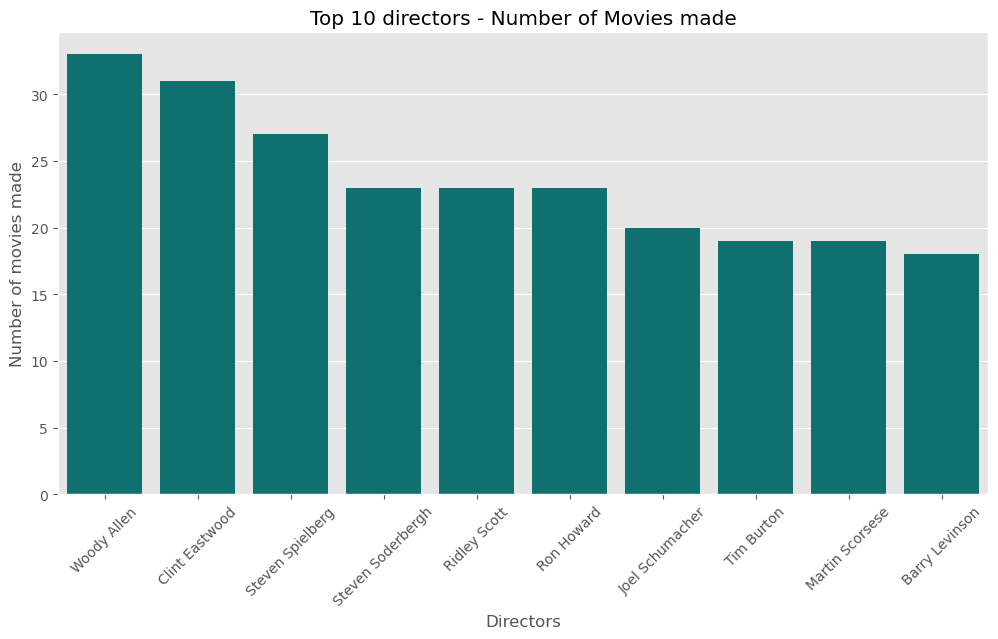

In [74]:
# Directors that make the most films:
top_director = df['director'].value_counts().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_director, x='director', y='count', color='teal')
plt.title('Top 10 directors - Number of Movies made')
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('Number of movies made')

Text(0, 0.5, 'Total gross revenue')

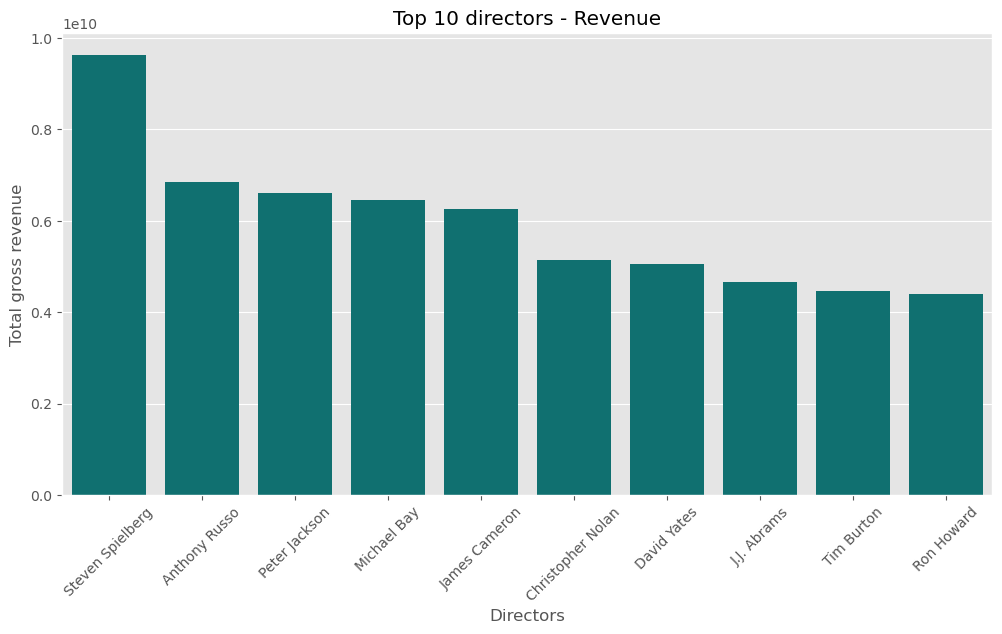

In [75]:
# Directors that generate highest gross revenue:
top_directors_gross = df.groupby('director')['gross'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_directors_gross, x='director', y='gross', color='teal')
plt.title('Top 10 directors - Revenue')
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('Total gross revenue')

'director', 'star', 'country', 'company', and 'year_fixed'

* Interestingly, apart from Steven Spielberg, the other directors that in the top 8 of gross revenue generating did not appear in the 'Top 10 directors - Revenue' List.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


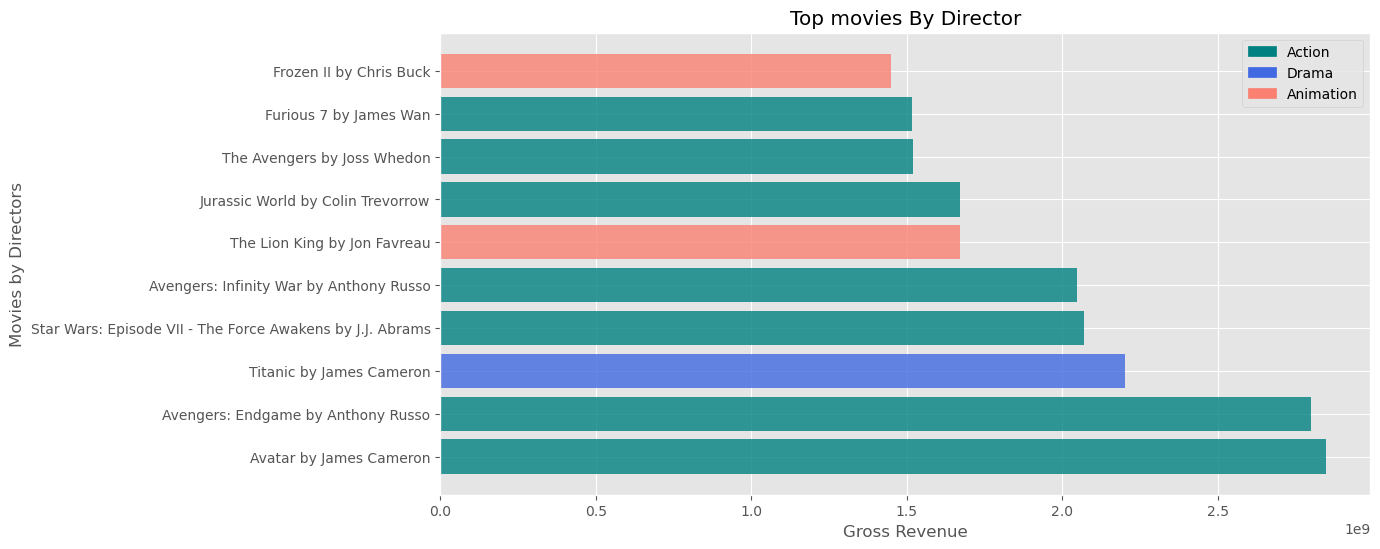

In [73]:
# Top revenue generaing movies:
top_movies = df[['name','director','genre', 'gross']].sort_values('gross', ascending=False).head(10)
top_movies['movies_director'] = top_movies.apply(lambda x: f"{x['name']} by {x['director']}", axis=1)
palette = {'Action': 'teal', 'Drama': 'royalblue', 'Animation': 'salmon'}
plt.barh(top_movies['movies_director'], top_movies['gross'], color=top_movies['genre'].map(palette), alpha=0.8)
plt.title('Top movies By Director')
plt.xlabel('Gross Revenue')
plt.ylabel('Movies by Directors')
plt.legend()
legend_handles = [mpatches.Patch(color=color, label=genre) for genre, color in palette.items()]
plt.legend(handles=legend_handles)

* 7/10 movies that generates the most revenue are Action movies. This explains why filmakers are jumping on the bandwagon of action movies, despite its inconsistency in gross revenue.